# DESAFIOS Aula 4

## Base para os desafios

In [0]:
# Base da Aula 4
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)

colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

corr = dados_notas.corr()

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [2]:
dados[colunas_de_notas].fillna(0).head(10)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
0        0.00        0.00        0.00        0.00             0.00
1      523.10      671.30      661.60      738.00           680.00
2      409.20      531.70      389.00      438.10           600.00
3      452.30      505.50      448.50      544.90           400.00
4        0.00        0.00        0.00        0.00             0.00
5        0.00        0.00        0.00        0.00             0.00
6      428.50      505.20      521.00      436.80           560.00
7        0.00        0.00        0.00        0.00             0.00
8      491.80      575.70      524.40      487.60           660.00
9      568.00      650.50      633.10      587.60           520.00

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

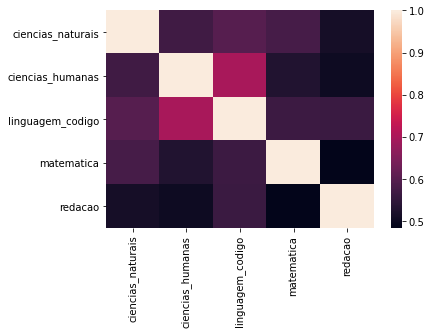

In [3]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Antes
heat_map_antes = sns.heatmap(corr)
plt.show()



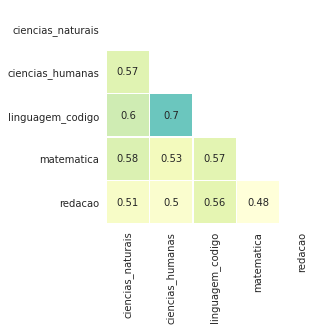

In [4]:
# Depois
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  heat_map = sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True,linewidths=.5, cbar=False, square=True )
  plt.show()

https://seaborn.pydata.org/generated/seaborn.heatmap.html


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

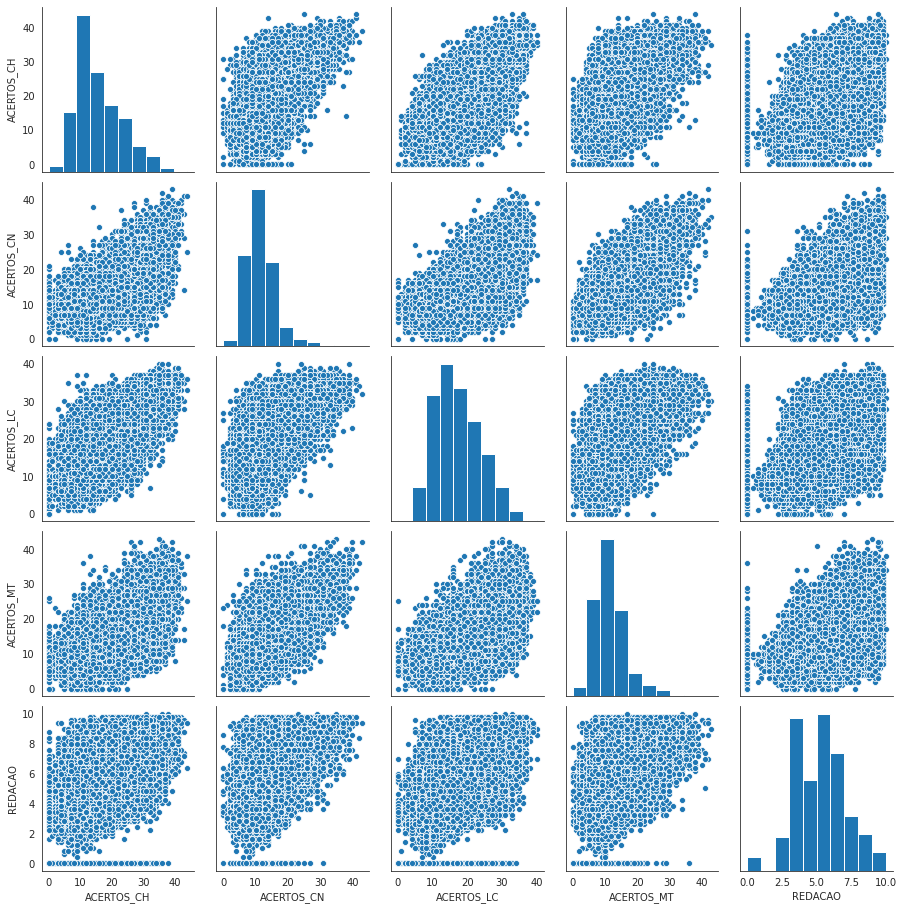

In [5]:
# Ignorando os Warnings 
import warnings
warnings.filterwarnings('ignore')

# Função de comparação para filtrar os acertos
def comparar(resposta: str, gabarito: str):
  acertos: int = 0
  for i in range(len(resposta) - 1):
    if resposta[i] == gabarito[i]:
      acertos += 1
  return acertos

# Separando as colunas do calculo para remover os valores Zerados
colunas = ['TX_GABARITO_CH','TX_RESPOSTAS_CH','TX_GABARITO_CN','TX_RESPOSTAS_CN','TX_GABARITO_LC','TX_RESPOSTAS_LC','TX_GABARITO_MT','TX_RESPOSTAS_MT','NU_NOTA_REDACAO']
dados_gabarito_resposta = dados[colunas].dropna()
# Utilizei a Funcao apply para aplicar a função
dados_gabarito_resposta['ACERTOS_CH'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_CH, x.TX_RESPOSTAS_CH), axis=1)
dados_gabarito_resposta['ACERTOS_CN'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_CN, x.TX_RESPOSTAS_CN), axis=1)
dados_gabarito_resposta['ACERTOS_LC'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_LC, x.TX_RESPOSTAS_LC), axis=1)
dados_gabarito_resposta['ACERTOS_MT'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_MT, x.TX_RESPOSTAS_MT), axis=1)
dados_gabarito_resposta['REDACAO'] =  dados_gabarito_resposta['NU_NOTA_REDACAO']/100 # ajuste para melhor visualizar a nota da redação
# Plotei o gráfico
with sns.axes_style("white"):
  pairplot = sns.pairplot(dados_gabarito_resposta[['ACERTOS_CH','ACERTOS_CN','ACERTOS_LC','ACERTOS_MT','REDACAO']])
  plt.show()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html?highlight=pandas.dataframe#pandas.DataFrame.applymap

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
dados_zerados = dados.replace(0, np.nan)
dados_zerados.to_csv('MICRODADOS_ENEM_2018_SAMPLE_43278_zerados.csv', index=False)

- Nesse caso estamos mascarando quem relamente tirou nota 0, eles vão ficar com falta!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [7]:
##### Não foi levado em consideração os tipos das provas, consequentemente só foi observado a ordem das perguntas na prova
##### Transformei os acertos em 1 e erros em 0
# Ignorando os Warnings 
import warnings
warnings.filterwarnings('ignore')
# Função de comparação resultado em um array com 1 para acerto 0 para erro
def comparar(resposta: str, gabarito: str):
  resutados = []
  for i in range(len(resposta)):
    if resposta[i-1] == gabarito[i-1]:
      resutados.append(1)
    else:
      resutados.append(0)
  return resutados
  
# Separando as colunas do calculo para remover os valores Zerados
colunas = ['TX_GABARITO_CH','TX_RESPOSTAS_CH','TX_GABARITO_CN','TX_RESPOSTAS_CN','TX_GABARITO_LC','TX_RESPOSTAS_LC','TX_GABARITO_MT','TX_RESPOSTAS_MT']
dados_gabarito_resposta = dados[colunas].dropna()

# Utilizei a Funcao apply para aplicar a função
dados_gabarito_resposta['ACERTOS_CH'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_CH, x.TX_RESPOSTAS_CH), axis=1)
dados_gabarito_resposta['ACERTOS_CN'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_CN, x.TX_RESPOSTAS_CN), axis=1)
dados_gabarito_resposta['ACERTOS_LC'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_LC, x.TX_RESPOSTAS_LC), axis=1)
dados_gabarito_resposta['ACERTOS_MT'] =  dados_gabarito_resposta.apply(lambda x: comparar(x.TX_GABARITO_MT, x.TX_RESPOSTAS_MT), axis=1)
dados_resultados = dados_gabarito_resposta[['ACERTOS_CH','ACERTOS_CN','ACERTOS_LC','ACERTOS_MT']]
display(dados_resultados.head())

ACERTOS_CH  ...                                         ACERTOS_MT
1  [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ...  ...  [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...
2  [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, ...  ...  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
3  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, ...  ...  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
8  [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...  ...  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...

[5 rows x 4 columns]

In [8]:
##### Somei os resultados CN, CH, MT, LC
# Função de somar as notas
def somar(notas1, notas2, notas3, notas4):
  resutados = []
  for i in range(len(notas1)):
   resutados.append(notas1[i-1] + notas2[i-1] + notas3[i-1] + notas4[i-1])
  return resutados

# Somando os acertos de cadas prova
dados_resultados['respostas'] =  dados_resultados.apply(lambda x: somar(x.ACERTOS_CH, x.ACERTOS_CN, x.ACERTOS_LC, x.ACERTOS_MT), axis=1)
display(dados_resultados['respostas'].head())

1    [2, 2, 2, 4, 3, 3, 3, 1, 0, 2, 1, 1, 3, 3, 3, ...
2    [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 2, 1, ...
3    [1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...
6    [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 1, ...
8    [1, 2, 1, 2, 2, 3, 1, 1, 1, 0, 0, 2, 2, 2, 2, ...
Name: respostas, dtype: object

In [9]:
##### Dividi o resultados por perguntas
# Função para gerar o numero de perguntas
def colunas_perguntas(quantidade_perguntas):
  quantidade_colunas_perguntas = []
  for i in range(quantidade_perguntas):
    quantidade_colunas_perguntas.append("P_" + str(i+1))
  return quantidade_colunas_perguntas
quantidade_perguntas = len(dados_gabarito_resposta['TX_GABARITO_CN'][1])
quantidade_colunas_perguntas = colunas_perguntas(quantidade_perguntas)

# Criando um novo datafrme com a quantidade_colunas_perguntas
dados_resultados_perguntas = pd.DataFrame(dados_resultados['respostas'].values.tolist(), columns=quantidade_colunas_perguntas)
display(dados_resultados_perguntas.head())

P_1  P_2  P_3  P_4  P_5  P_6  P_7  ...  P_39  P_40  P_41  P_42  P_43  P_44  P_45
0    2    2    2    4    3    3    3  ...     2     2     1     3     0     1     1
1    0    1    1    1    0    1    0  ...     1     1     0     1     0     1     2
2    1    1    0    0    2    0    1  ...     1     1     2     1     3     2     0
3    1    1    0    0    0    0    0  ...     2     1     3     1     2     1     0
4    1    2    1    2    2    3    1  ...     2     1     2     1     0     1     1

[5 rows x 45 columns]

In [10]:
##### Calculei o Resultado
total_registros = len(dados_resultados_perguntas) * 4 # A quantidade de Resposta vzs 4 (CN, CH, MT, LC)
print("Total de Testes: %s por pergunta" % (total_registros))
total_acertos_por_pergunta = dados_resultados_perguntas.sum()
total_erros_por_pergunta = (total_registros - total_acertos_por_pergunta)
print("A pergunta com mais Acertos foi: %s com %s acertos" % (total_acertos_por_pergunta.idxmax(), total_acertos_por_pergunta.max()))
print("A pergunta com mais Erros foi: %s com %s erros" % (total_erros_por_pergunta.idxmax(), total_erros_por_pergunta.max()))

Total de Testes: 389080 por pergunta
A pergunta com mais Acertos foi: P_19 com 144632 acertos
A pergunta com mais Erros foi: P_22 com 291454 erros


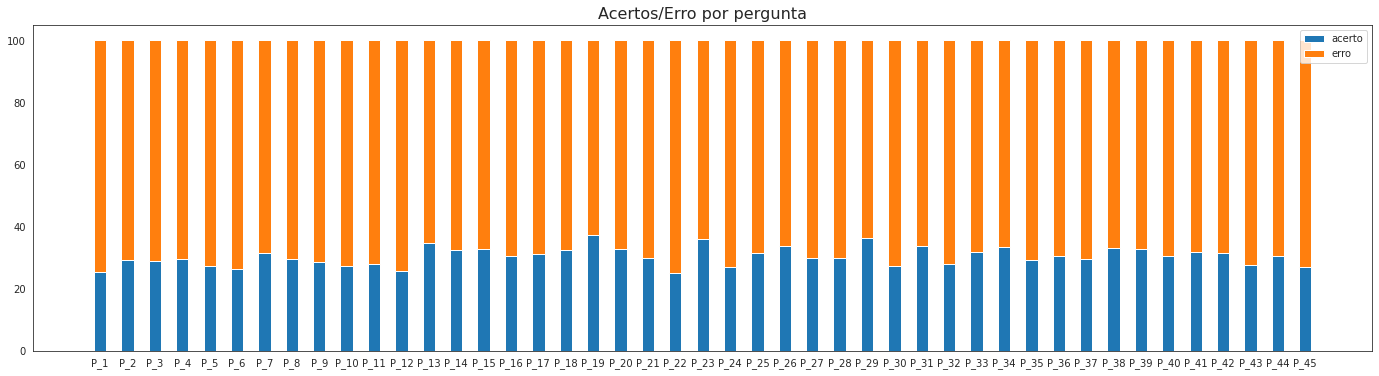

In [11]:
# plotei a porcentagem no grafico do desafio anterior
total_acertos_por_pergunta_porcentagem = (total_acertos_por_pergunta * 100) / total_registros
total_erros_por_pergunta_porcentagem = (total_erros_por_pergunta * 100) / total_registros
width = 0.45   
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(24, 6))
  ax.bar(total_acertos_por_pergunta_porcentagem.index, total_acertos_por_pergunta_porcentagem.values, width,  label='acerto')
  ax.bar(total_erros_por_pergunta_porcentagem.index, total_erros_por_pergunta_porcentagem.values, width, bottom=total_acertos_por_pergunta_porcentagem.values, label='erro')
  plt.title("Acertos/Erro por pergunta",fontsize= 16)
  ax.legend()
  plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.


Aguns Podcasts que tratam  de informações sensíveis: 

- Datahackersbr podcast - As maiores tretas e polêmicas no mundo de Dados - Data Hackers Podcast 13 

  https://open.spotify.com/episode/4FaVQWQzFhM8EjXJQ7fVga?si=oSrwV9l1QsO6_P_JMVOIaQ



- BrainCast - Lei Geral de Proteção de Dados

  https://open.spotify.com/episode/7xgQa8bfoODBXTCx6gQJrV?si=td7aaQ0PSzGWQi5uu0ua-g


- Nercast - NerdTech 45 - Deepfake é pop

  https://open.spotify.com/episode/5UxvlrmfsurmpiQsOhc5vN?si=iEAhaQxGR0Snjsfs2gmhvQ


- Nerdologia Tech - O que é ciência de dados

  https://www.youtube.com/watch?v=ykSILAQQu6o



Pelo que conclui das conclusões, frase esquisita, a maior preocupação desse mercado é validar os resultados, como saber se o resultado entregado é realmente a realidade? Será que os dados não estão com viés que pode impactar na negativamente na vida das pessoas.
Outra preocupação é com a privacidade, quem nunca ficou com a impressão que os dispositivos conseguem ler pensamento e mostrar propaganda de algo? por isso A LGPD e leis estão sendo criadas para regulamentarizar isso.